args

In [76]:
import networkx

In [75]:
len(np.arange(0.0, 0.5, 0.005))

100

In [68]:
np.logspace(-16, 2, num=25)

array([1.00000000e-16, 5.62341325e-16, 3.16227766e-15, 1.77827941e-14,
       1.00000000e-13, 5.62341325e-13, 3.16227766e-12, 1.77827941e-11,
       1.00000000e-10, 5.62341325e-10, 3.16227766e-09, 1.77827941e-08,
       1.00000000e-07, 5.62341325e-07, 3.16227766e-06, 1.77827941e-05,
       1.00000000e-04, 5.62341325e-04, 3.16227766e-03, 1.77827941e-02,
       1.00000000e-01, 5.62341325e-01, 3.16227766e+00, 1.77827941e+01,
       1.00000000e+02])

# Pareto

In [73]:
from scipy.stats import pareto
pareto.rvs(0.5,
                        loc=0,
                        scale=1,
                        size=50,
                        random_state=None,
                    )*100

array([1.85347817e+02, 1.05033880e+02, 2.34802525e+03, 1.45784683e+02,
       1.02944513e+02, 3.62975930e+03, 2.23559980e+03, 3.20404495e+02,
       1.54971648e+02, 3.57275985e+02, 1.77522349e+02, 1.05759616e+03,
       1.39795634e+02, 4.66450597e+02, 1.98296310e+02, 1.56288506e+03,
       6.57307311e+02, 2.25741705e+02, 4.93047286e+02, 1.42690261e+02,
       1.33882649e+02, 1.06899677e+02, 6.15640315e+02, 1.82430386e+03,
       3.28044409e+02, 1.57550906e+02, 4.20637137e+02, 2.37889031e+03,
       1.82537336e+02, 9.17037534e+02, 1.44006804e+03, 1.27250264e+02,
       3.92073650e+02, 3.96589127e+04, 6.00403934e+02, 1.97043495e+02,
       1.14338720e+03, 4.20060846e+02, 7.55616597e+02, 1.44562022e+02,
       2.69618412e+04, 3.27473816e+02, 3.54472153e+03, 1.26604089e+04,
       1.18409109e+02, 7.09563436e+02, 7.36947121e+02, 5.00827084e+06,
       1.71119223e+02, 1.03585075e+02])

# building of the shocks with normal law for the relative changes / returns
it means the returns are stationary but not deposits process which is a pure random walk log normal

In [3]:
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# define middle of the list of banks
deposits = np.random.rand(int(1e5))*500
plt.hist(deposits)
N_max = len(deposits) - len(deposits) % 2  # can not apply a shock on
# one bank if odd nb
N_half = int(len(deposits) / 2)

In [ ]:
rho_1 = stats.truncnorm(
            (norm_lower - mu) / vol, (norm_upper - mu) / vol, loc=mu, scale=vol
        ).rvs(N_half)

In [ ]:
vol = 0.3
mu=0
norm_lower=-1
norm_upper=0

rho_1 = stats.truncnorm(
        (norm_lower - mu) / vol,
        (norm_upper - mu) / vol,
        loc=mu,
        scale=vol).rvs(N_half)
plt.figure(figsize=(15,5))
bin = plt.hist(rho_1, bins =200)
print(np.mean(rho_1),np.var(rho_1), np.max(rho_1), np.min(rho_1))

In [ ]:
# apply a positive relative shock on the second half of the banks
rho_2 = -rho_1 * deposits[0:N_half] / deposits[N_half:N_max]
plt.figure(figsize=(15,5))
bin = plt.hist(rho_2, bins =200)
print(np.mean(rho_2),np.var(rho_2), np.max(rho_2), np.min(rho_2))

In [ ]:
# concatenate the relative shocks
if len(deposits) > N_max:
    rho = np.concatenate([rho_1, rho_2, [0]])
elif len(deposits) == N_max:
    rho = np.concatenate([rho_1, rho_2])
else:
    assert False, ""

print(np.mean(rho),np.var(rho), np.max(rho), np.min(rho))
plt.figure(figsize=(15,5))
bin = plt.hist(rho, bins =200)


In [ ]:
# compute the absolute shock from the deposit amount
shocks = deposits * rho
plt.figure(figsize=(15,5))
bin = plt.hist(shocks, bins =200)

we do obtain something close to a log normal for the distribution of the deposits 

In [ ]:
# compute the new deposits
new_deposits = deposits + shocks
plt.figure(figsize=(15,5))
bin = plt.hist(new_deposits, bins =200)

In [ ]:
new_deposits

# Comparison of diffusions shocks types
the processus for the deposits is non stationary in any case but lux proposes to add a mean reverting component to make it more realistic
not implemented yet

9.916938292829562 0.002624439085201063 10.017107247369722 9.82719444770942
2.294230904884009 2.6643906756058824e-05 2.3042943561081737 2.2851534862720846
2.3025850929983007 1.2497265581573788e-15 2.302585302245282 2.3025848965022875
2.302585095494249 1.3336663146872727e-10 2.3026382206178497 2.3025306595739274


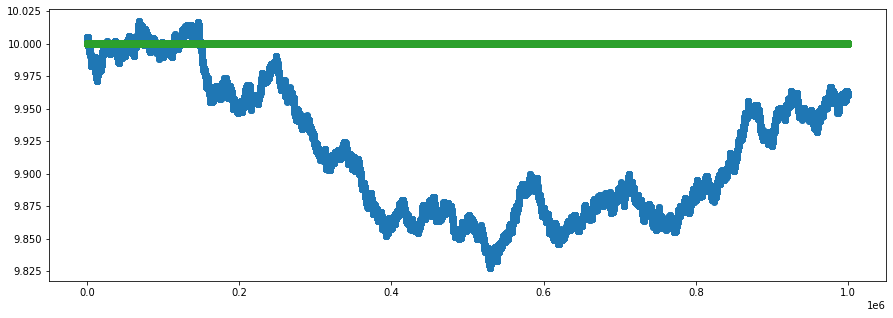

In [81]:
walk = np.zeros(int(1e6))
walk[0] = 10
walk_p = np.zeros(int(1e6))
walk_p[0] = 10
walk_mr = np.zeros(int(1e6))
walk_mr[0] = 10

for i in range(1,int(1e6)):
    # not mean reverting
    walk[i] = walk[i-1] + walk[i-1]*np.random.normal(scale=0.00001)

    # equivalent to log normal approach
    walk_p[i] = walk_p[0]*np.exp(-0.5*(0.00001**2)*np.random.normal(scale=np.sqrt(i)))

    # mean reverting
    walk_mr[i] = walk_mr[i-1] + 0.5*(10-walk_mr[i-1]) + walk_mr[i-1]*np.random.normal(scale=0.00001)

plt.figure(figsize=(15,5))
plt.plot(walk,'o-')
plt.plot(walk_p,'o-')
plt.plot(walk_mr,'o-')

print(np.mean(walk),np.var(walk), np.max(walk), np.min(walk))
print(np.mean(np.log(walk)),np.var(np.log(walk)), np.max(np.log(walk)), np.min(np.log(walk)))
print(np.mean(np.log(walk_p)),np.var(np.log(walk_p)), np.max(np.log(walk_p)), np.min(np.log(walk_p)))
print(np.mean(np.log(walk_mr)),np.var(np.log(walk_mr)), np.max(np.log(walk_mr)), np.min(np.log(walk_mr)))


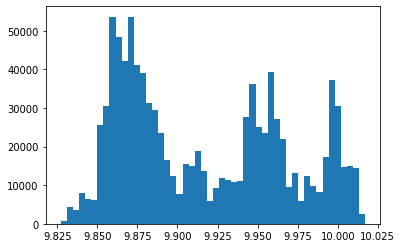

In [82]:
bin  = plt.hist(walk, bins=50)


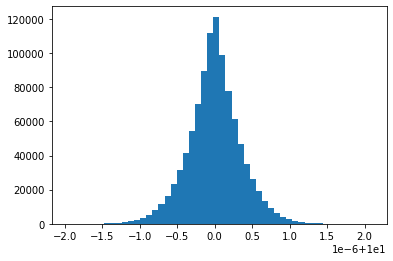

In [83]:
bin  = plt.hist(walk_p, bins=50)


In [71]:
walk_p

array([1.00000000e+01, 1.18901736e+01, 8.32428711e+00, ...,
       7.11174097e+05, 2.94536566e-16, 7.11797006e+75])

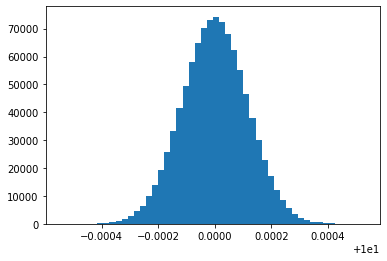

In [84]:
bin  = plt.hist(walk_mr, bins=50)

# Dummy tests

In [4]:
output_keys = [
        "Av. in-degree",
        "Collateral reuse",
        "Core-Peri. p_val.",
        "Gini",
        "Jaccard index",
        "Network density",
        "Repos av. maturity",
        "Repos tot. volume",
        "Repos av. volume",
    ]

In [7]:
output_keys.remove("Core-Peri. p_val.")

ValueError: list.remove(x): x not in list

In [9]:
dico = {"ding": 0, "dong": 4, "a": 5}

In [11]:
sorted(dico.keys())

['a', 'ding', 'dong']

In [61]:
len(np.arange(0.01, 1, 0.02))

50

In [58]:
np.logspace(-3, 2, num=25)

array([1.00000000e-03, 1.61559810e-03, 2.61015722e-03, 4.21696503e-03,
       6.81292069e-03, 1.10069417e-02, 1.77827941e-02, 2.87298483e-02,
       4.64158883e-02, 7.49894209e-02, 1.21152766e-01, 1.95734178e-01,
       3.16227766e-01, 5.10896977e-01, 8.25404185e-01, 1.33352143e+00,
       2.15443469e+00, 3.48070059e+00, 5.62341325e+00, 9.08517576e+00,
       1.46779927e+01, 2.37137371e+01, 3.83118685e+01, 6.18965819e+01,
       1.00000000e+02])

In [2]:
import function as fct
result_location = "./results/"
    # axes = [
    #     "beta",
    #     "shocks_vol",
    #     "n_banks",
    #     "min_repo_size",
    #     "alpha_pareto",
    #     "collateral",
    # ]
axes = [
        "beta",
    ]
output_keys = [
        "Av. in degree",
        "Collateral reuse",
        "Core-Peri. p_val.",
        "Gini",
        "Jaccard index",
        "Network density",
        "Repos av. maturity",
        "Repos market size",
        "Repos av. size",
    ]
args = fct.build_args(
            axe=axes[0],
            n_banks=2,
            alpha=0.01,
            beta_init=0.5,  # for the initial collateral available
            beta_reg=0.5,
            beta_star=0.5,
            gamma=0.03,
            collateral_value=1.0,
            initialization_method="constant",
            alpha_pareto=1.3,
            shocks_method="bilateral",
            shocks_law="normal",
            shocks_vol=0.05,
            result_location=result_location,
            min_repo_size=1e-10,
            time_steps=2,
            save_every=2500,
            jaccard_periods=[20],
            output_opt=True,
            output_keys=output_keys,
        )

In [3]:
args[0]

(2,
 0.01,
 0.01,
 0.01,
 0.01,
 0.03,
 1.0,
 'constant',
 1.3,
 'bilateral',
 'normal',
 0.05,
 './results/beta/0.01/',
 1e-10,
 2,
 2500,
 [20],
 True,
 ['Av. in degree',
  'Collateral reuse',
  'Core-Peri. p_val.',
  'Gini',
  'Jaccard index',
  'Network density',
  'Repos av. maturity',
  'Repos market size',
  'Repos av. size'])

# Analysis beta init issue

In [1]:
import shocks as sh
from network import ClassNetwork
import numpy as np

In [2]:
network = ClassNetwork(
    n_banks=3,
    alpha=0.01,
    beta_init=100,
    beta_reg=0.1,
    beta_star=0.1,
    gamma=0.03,
    collateral_value=1.0,
    initialization_method="constant",
    alpha_pareto=1.3,
    shocks_method="bilateral",
    shocks_law="normal",
    shocks_vol=0.01,
    result_location="./results/test/",
    min_repo_size=1e-10,
    )

network.banks

c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:569: RuntimeWarning: invalid value encountered in double_scalars
  np.sum(weighted_repo_maturity) / total_repo_amount
c:\Users\VictorLeCoz\OneDrive - Quant Decisions S.L\Documents\PhD\secured-inter-bank-network\network.py:727: RuntimeWarning: invalid value encountered in double_scalars
  self.single_trajectory["Repos av. maturity"][-1] = np.sum(


In [7]:
gamma = 0.5
1/(1-gamma) - 0.01

1.99

# Line by line analysis

In [3]:
network.reset_network()
print(network.banks[0])

Bank 0
        ----------------------------------------
        Total Assets: 103.09
        ----Cash: 1.0
        ----Securities Usable: 9999.0
        ----Securities Encumbered: 0.0
        ----Reverse Repos: 0.0
        ----Loans: -9896.91
        ----------------------------------------
        Total Liabilities: 103.09
        ----Own Funds: 3.09
        ----Deposits: 100.0
        ----Repos: 0.0
        ----MROs: 0.0
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 0.0
        ----Collateral Reuse: 0.0
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: 100000.0%
        ----Cash / Deposits (for minimal reserves): 1.0%
        ----Leverage / Solvency ratio: 3.0%
        


In [26]:
network.banks[0].banks["1"].reverse_repos

{'0': 0.0, '1': 0.0}

In [29]:
for bank in network.banks[0].banks.values():
    print(bank.reverse_repos)


{'0': 0.0, '1': 0.0}


## step_network()

In [46]:
# Generation of the shocks
shocks = sh.generate_bilateral_shocks(
        network.network_deposits, law=network.shocks_law, vol=network.shocks_vol)

# For loops over the instances of ClassBank in the ClassNetwork.
ix = np.arange(network.n_banks)  # Defines an index of the banks
for i in ix:
    network.banks[i].set_shock(shocks[i])
    print(shocks[i])




1.403235798885991
-1.403235798885991


In [48]:
print(network.banks[1].shock)
print(network.banks[1])


-1.403235798885991
Bank 1
        ----------------------------------------
        Total Assets: 101.69
        ----Cash: -0.4
        ----Securities Usable: 0.0
        ----Securities Encumbered: 0.0
        ----Reverse Repos: 0.0
        ----Loans: 102.09
        ----------------------------------------
        Total Liabilities: 101.69
        ----Own Funds: 3.09
        ----Deposits: 98.6
        ----Repos: 0.0
        ----MROs: 0.0
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 0.0
        ----Collateral Reuse: 0.0
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: -4.09%
        ----Cash / Deposits (for minimal reserves): -0.41%
        ----Leverage / Solvency ratio: 3.04%
        


In [49]:
for i in ix:
    network.banks[i].step_lcr_mgt()

print(network.banks[1].shock)
print(network.banks[1])

-1.403235798885991
Bank 1
        ----------------------------------------
        Total Assets: 111.95
        ----Cash: 9.86
        ----Securities Usable: 0.0
        ----Securities Encumbered: 0.0
        ----Reverse Repos: 0.0
        ----Loans: 102.09
        ----------------------------------------
        Total Liabilities: 111.95
        ----Own Funds: 3.09
        ----Deposits: 98.6
        ----Repos: 0.0
        ----MROs: 10.26
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 0.0
        ----Collateral Reuse: 0.0
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: 100.0%
        ----Cash / Deposits (for minimal reserves): 10.0%
        ----Leverage / Solvency ratio: 2.76%
        


In [50]:

print(shocks[i])


ix = np.random.permutation(ix)  # Permutation of the
# banks' indexes to decide in which order banks can close their repos.
for i in ix:
    network.banks[i].step_end_repos()  # Run the step end repos for the bank network

print(network.banks[0])

-1.403235798885991
Bank 0
        ----------------------------------------
        Total Assets: 112.23
        ----Cash: 10.14
        ----Securities Usable: 0.0
        ----Securities Encumbered: 0.0
        ----Reverse Repos: 0.0
        ----Loans: 102.09
        ----------------------------------------
        Total Liabilities: 112.23
        ----Own Funds: 3.09
        ----Deposits: 101.4
        ----Repos: 0.0
        ----MROs: 7.74
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 0.0
        ----Collateral Reuse: 0.0
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: 100.0%
        ----Cash / Deposits (for minimal reserves): 10.0%
        ----Leverage / Solvency ratio: 2.76%
        


In [18]:


ix = np.random.permutation(ix)  # New permutation of the
# banks' indexes to decide in which order banks can enter into repos
for i in ix:
    network.banks[i].step_enter_repos()
for i in ix:
    network.banks[i].assert_minimum_reserves()
    network.banks[i].assert_alm()
    network.banks[i].assert_lcr()
    # network.banks[i].assert_leverage()
    network.banks[i].steps += 1

Bank 0
        ----------------------------------------
        Total Assets: 102.39
        ----Cash: -39.07
        ----Securities Usable: 49.0
        ----Securities Encumbered: 0.0
        ----Reverse Repos: 0.0
        ----Loans: 92.46
        ----------------------------------------
        Total Liabilities: 102.39
        ----Own Funds: 3.09
        ----Deposits: 99.3
        ----Repos: 0.0
        ----MROs: 0.0
        ----------------------------------------
        Off-balance sheet Items:
        ----Collateral received: 0.0
        ----Collateral Reuse: 0.0
        ----------------------------------------
        Regulatory:
        ----Liquidity Coverage Ratio: 100.0%
        ----Cash / Deposits (for minimal reserves): -39.35%
        ----Leverage / Solvency ratio: 3.02%
        


<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
<>:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_12956\1964417710.py:11: SyntaxWarning: assertion is always true, perhaps remove parentheses?
  assert (


AssertionError: repo request unsatified for bank 1, for the amount 39.93675462813507

In [74]:
0.95*5

4.75

In [80]:
weights = [0.1, 10]
weights[weights>1.0] = np.log(weights)

TypeError: '>' not supported between instances of 'list' and 'float'

In [81]:
bool_test = False
if not(bool_test):
    print(not(bool_test))

True


# multiprocessing

In [86]:
import os
os.cpu_count()

8

In [84]:
import threading

In [90]:
threading.active_count()

6

In [91]:
threading.enumerate()

[<_MainThread(MainThread, started 25424)>,
 <Thread(IOPub, started daemon 29660)>,
 <Heartbeat(Heartbeat, started daemon 24284)>,
 <ControlThread(Control, started daemon 4292)>,
 <HistorySavingThread(IPythonHistorySavingThread, started 12112)>,
 <ParentPollerWindows(Thread-2, started daemon 1184)>]

In [104]:
import multiprocessing as mp
int(mp.cpu_count()/2)

4

In [89]:
os.sched_getaffinity(0)

AttributeError: module 'os' has no attribute 'sched_getaffinity'

In [101]:
mp.Pool.close()

AttributeError: 'function' object has no attribute 'close'

In [105]:
import multiprocessing as mp
mp.pool.close()

AttributeError: module 'multiprocessing.pool' has no attribute 'close'

: 

In [1]:
test = 0

In [2]:
import socket
socket.gethostname()

'DESKTOP-45I2ALE'

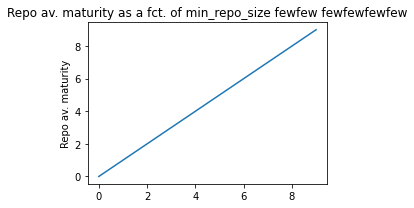

In [44]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(4,3))
plt.ylabel("Repo av. maturity")
plt.plot(range(10))
plt.title("Repo av. maturity as a fct. of min_repo_size fewfew fewfewfewfew")
# plt.gca().set_title("Repo av. maturity as a fct. of min_tr_size", x=0)
fig.tight_layout()
plt.savefig("./results/dingo_test.pdf", bbox_inches='tight')



In [45]:
a=[-3,-5]

In [48]:
import numpy as np
np.abs(a)

array([3, 5])

In [50]:
np.log(0)

C:\Users\VictorLeCoz\AppData\Local\Temp\ipykernel_10216\2933082444.py:1: RuntimeWarning: divide by zero encountered in log
  np.log(0)


-inf

In [51]:
np.log(1.8)

0.5877866649021191

# non conservative shocks

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
def generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )
        shocks = new_deposits - deposits
    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)
        shocks = new_deposits - deposits

    elif law == "normal-mean-reverting":
        mean_reversion = 1
        epsilon = np.random.normal(loc=0,scale=vol,size=len(deposits))
        shocks = mean_reversion * (initial_deposits-deposits) + epsilon*total_assets
    else:
        assert False, ""
    
    shocks = shocks -np.mean(shocks)
    return shocks

In [7]:
deposits = np.random.rand(int(50))*100
initial_deposits = np.random.rand(int(50))*100
total_assets = deposits
law = "normal-mean-reverting"
vol = 0.05
shocks = generate_non_conservative_shocks(deposits, initial_deposits, total_assets, law, vol)


(array([4., 5., 4., 2., 7., 6., 7., 8., 2., 5.]),
 array([-74.75353562, -60.36456496, -45.9755943 , -31.58662364,
        -17.19765299,  -2.80868233,  11.58028833,  25.96925899,
         40.35822965,  54.74720031,  69.13617097]),
 <BarContainer object of 10 artists>)

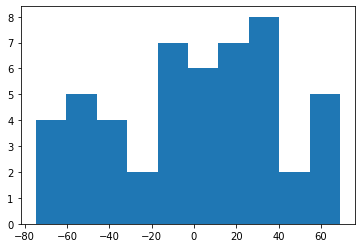

In [8]:
plt.hist(shocks)

26.983093114378335

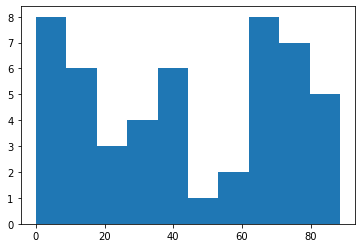

In [9]:
new_deposits = (deposits + shocks).clip(min=0)
bin = plt.hist(new_deposits)
np.sum(new_deposits)-np.sum(deposits)

## time serie dynamics generated by non conservative shocks
target: get total deposits / assets below 1e3 after 10 000 steps

In [21]:
import shocks as sh
import numpy as np
import pandas as pd 

In [22]:
def generate_non_conservative_shocks(
    deposits, initial_deposits, total_assets, law, vol
):
    if law == "log-normal":
        std_control = np.sqrt(np.log(1.0 + vol**2.0))
        new_deposits = (
            np.random.lognormal(
                mean=-0.5 * std_control**2,
                sigma=std_control,
                size=len(deposits),
            )
            * deposits
        )

    elif law == "normal":
        new_deposits = np.maximum(deposits + np.random.randn(len(deposits)) * vol, 0.0)

    elif law == "normal-mean-reverting":
        mean_reversion = vol
        epsilon = np.random.normal(loc=0, scale=vol, size=len(deposits))
        shocks = mean_reversion * (initial_deposits - deposits) + epsilon * total_assets

        # center the shocks
        shocks = shocks - np.mean(shocks)

        # clip the negative shocks to the deposits size
        new_deposits = (deposits + shocks).clip(min=0)

    else:
        assert False, ""

    shocks = new_deposits - deposits
    return shocks

In [26]:
# define parameters
deposits = np.random.rand(int(50))*100
initial_deposits = np.random.rand(int(50))*100
total_assets = deposits
law ="normal-mean-reverting"
vol = 0.01

In [30]:
# run analysis

deposits_time_serie = pd.DataFrame(columns=range(50),index=range(10000))

for step in range(10000):
    shocks = generate_non_conservative_shocks(deposits, initial_deposits, deposits, law, vol)
    deposits = deposits + shocks
    deposits_time_serie.loc[step] = deposits
    


<AxesSubplot:>

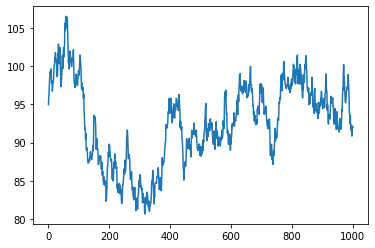

In [36]:
deposits_time_serie.loc[0:1000,6].plot()

# z -dummy

In [41]:
int(1e4)

10000